In [22]:
# makame na TASKu :)
"""small example"""
import sys
sys.path.append("../../.."); sys.path.append("../../../src/python_modules")
import os             # knihovna zpristupnuje operace se soubory - tady konkretne nacteni nazvu z adresare
import plantbox as pb
import vtk_plot as vp
from datetime import date

rs = pb.RootSystem()

# Open plant and root parameter from a file
path = "../../../modelparameter/rootsystem/" 
name = "Triticum_aestivum_a_Bingham_2011"    # POZOR, rostlina:), napr. Lupinus_angustifolius_Chen_2011
rs.readParameters(path + name + ".xml")

# Initializeo
rs.initialize()

# yymmdd
today = date.today()
date = today.strftime("%y%m%d")
print("datum je dnes", date)

# Simulate
for i in range(1, 3, 1):
    rs.simulate(i, True)
#    vp.plot_roots(rs, "creationTime")
#    # writeout
#    vtpname = "resultsLAB/RLab_" + str(date) + "_" + name + "_" + str(i) + "denni_simulace.vtp"
#    rs.write(vtpname)
#else:
#    print("DONE")

print(rs.getNumberOfNodes(), "nodes")
print(rs.getNumberOfSegments(), "segments")
print(dir(rs))

files = os.listdir(path)  # path je definovan vyse
files.sort()
#print(files)

datum je dnes 210209
495 nodes
493 segments
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'addOrgan', 'copy', 'createGrowthFunction', 'createTropismFunction', 'getBaseRoots', 'getNewNodeCTs', 'getNewNodes', 'getNewSegmentOrigins', 'getNewSegments', 'getNodeCTs', 'getNodeIndex', 'getNodes', 'getNumberOfNewNodes', 'getNumberOfNewOrgans', 'getNumberOfNodes', 'getNumberOfOrgans', 'getNumberOfRoots', 'getNumberOfSegments', 'getOrganIndex', 'getOrganRandomParameter', 'getOrgans', 'getParameter', 'getPolylineCTs', 'getPolylines', 'getRSMLProperties', 'getRSMLSkip', 'getRootBases', 'getRootRandomParameter', 'getRootSystemParameter', 'getRootTips', 'getRoots', 'getSegmentCTs', 'getSegmentOrigins', 'getSegments', 'getShootSegmen

404 nodes
402 segments


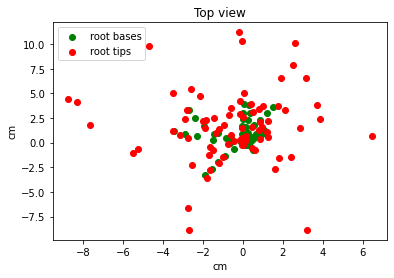

Unequal tips and basals: 0


In [60]:
"""find root tips and bases (two approaches)"""
import sys
sys.path.append("../../.."); sys.path.append("../../../src/python_modules")
import plantbox as pb

import numpy as np
import matplotlib.pyplot as plt

path = "../../../modelparameter/rootsystem/"
name = "Pisum_sativum_a_Pagès_2014"

rs = pb.RootSystem()
rs.readParameters(path + name + ".xml")
rs.initialize()
rs.simulate(16, True)

print(rs.getNumberOfNodes(), "nodes")
print(rs.getNumberOfSegments(), "segments")

# Use polyline representation of the roots
polylines = rs.getPolylines()
bases = np.zeros((len(polylines), 3))
tips = np.zeros((len(polylines), 3))
for i, r in enumerate(polylines):
    bases[i, :] = [r[0].x, r[0].y, r[0].z]  # first index is the base
    tips[i, :] = [r[-1].x, r[-1].y, r[-1].z]  # last index is the tip

# Or, use node indices to find tip or base nodes
nodes = np.array((list(map(np.array, rs.getNodes()))))
tipI = rs.getRootTips()
baseI = rs.getRootBases()

# Plot results (1st approach)
plt.title("Top view")
plt.xlabel("cm")
plt.ylabel("cm")
plt.scatter(nodes[baseI, 0], nodes[baseI, 1], c = "g", label = "root bases")
plt.scatter(nodes[tipI, 0], nodes[tipI, 1], c = "r", label = "root tips")
plt.legend()
#plt.savefig("results/example_2e.png")
plt.show()

 # check if the two approaches yield the same result
uneq = np.sum(nodes[baseI, :] != bases) + np.sum(nodes[tipI, :] != tips)
print("Unequal tips and basals:", uneq)


In [23]:
from datetime import date

today = date.today()
# mm/dd/y
d3 = today.strftime("%m/%d/%y")
print("d3 =", d3)

d3 = 01/19/21


In [53]:
# Export final result (as vtp)
#rs.write("resultsLAB/RLab201012_Heliantus_Pagès_2013.vtp")

# Export final result as rsml 
# nefunguje - vt.write_rsml("resultsLAB/Triticum_aestivum_LAB201006.rsml", rs, "meta")
# FUNGUJE - rs.write("resultsLAB/test.rsml")

# Plot, using vtk
#vp.plot_roots(rs, "creationTime")
# cubeAxesActor = vtk.vtkCubeAxesActor()
# cubeAxesActor.SetBounds(rs.GetOutput().GetBounds())
# cubeAxesActor.SetCamera(renderer.GetActiveCamera())

#help(rs.getNodes())
#dir(rs)
#print(rs.getNodes())
Nodes = rs.getNodes() # 
#print(Nodes[9].y)

# ve vtk_plpot jako BOUNDS
nNodes=len(Nodes)

xx=[0] * nNodes
yy=[0] * nNodes
zz=[0] * nNodes
for i in range(0, nNodes):
    xx[i]=Nodes[i].x
    yy[i]=Nodes[i].y
    zz[i]=Nodes[i].z

xmax=max(xx)
ymax=max(yy)
zmax=max(zz)
print(xmax)

xmin=min(xx)
ymin=min(yy)
zmin=min(zz)
print(ymin)

xc=(xmax+xmin)/2
yc=(ymax+ymin)/2
zc=(zmax+zmin)/2

dx=(xmax-xc)*1.2
xmax=xc+dx
xmin=xc-dx
dy=(ymax-yc)*1.2
ymax=yc+dy
ymin=yc-dy
dz=(zmax-zc)*1.2
zmax=zc+dz
zmin=zc-dz


cubeAxesActor = vp.vtk.vtkCubeAxesActor()
cubeAxesActor.SetBounds(xmin,xmax,ymin,ymax,zmin,zmax)
#cubeAxesActor.SetCamera(vp.ren.GetActiveCamera())
#vp.ren.ResetCamera()
vp.ren.AddActor(CubeAxesActor);
vp.plot_roots(rs, "creationTime")


#limits = 'no' # dat sem nalezena maxima z Nodes[] ...

18.88492884968773
-26.333050969978665


AttributeError: module 'vtk_plot' has no attribute 'ren'

#### Oblibene IPython magics

In [ ]:
%%writefile
%pycat
%load

In [ ]:
%% magicwords help

In [ ]:
%pycat example1_LAB200811_multiple.py

## WIP

In [70]:
#%%writefile example1_LAB201006_multiple_hydrotropism_Nov21.py
"""hydrotropism in a middle of a two plants"""
import sys; sys.path.append("../../..")
import plantbox as pb
import vtk_plot as vp

rs = pb.RootSystem()
path = "../../../modelparameter/rootsystem/"
name = ["RootLab/LabMod_Bush", "Juncus_squarrosus_Clausnitzer_1994", "RootLab/LabMod_Bush", "RootLab/LabMod_Bush"]

# Static soil property in a thin layer
maxS = 5  # maximal
minS = 0.5  # minimal
slope = 10  # linear gradient between min and max (cm), half length of linear interpolation between fmax and fmin
box = pb.SDF_PlantBox(200, 200, 30)  # cm
layer = pb.SDF_RotateTranslate(box, pb.Vector3d(0, 0, 10))
soil_prop = pb.SoilLookUpSDF(layer, maxS, minS, slope)

C = 1   # number of columns
R = 1   # and rows
dist = 35  # distance between the root systems [cm]

# Initializes C*R root systems
allRS = []
for i in range(0, C):
    for j in range(0, R):
        rs = pb.RootSystem()
        rs.readParameters(path + name[i] + ".xml")
        # Manually set tropism to hydrotropism for the first six root types
        #sigma = [0.05, 0.3, 0.5, 0.6]
        #tropN = [0.7, 0.8, 1.0, 1.0] # *2 strength of tropism
        #RootLifeTime = [50, 40, 40, 30]
        #for p in rs.getRootRandomParameter():
            #p.dx = 0.5  # adjust resolution
            #p.tropismT = pb.TropismType.hydro
            #p.tropismN = tropN[p.subType - 1]  # strength of tropism
            #p.tropismS = sigma[p.subType - 1]
            #p.rlt = RootLifeTime[i]
            
        rs.getRootSystemParameter().seedPos = pb.Vector3d(dist * i - (dist/2), dist * j, -4.)  # cm
        rs.setSoil(soil_prop) # Set the soil properties before calling initialize
        rs.initialize(False)  # verbose = False
        allRS.append(rs)
        
# Simulate dynamically
simtime = 90  # e.g. 30 or 60 days
dt = 1
N = round(simtime / dt)
for _ in range(0, N):
    for rs in allRS:
        ## in a dynamic soil setting you would need to update the soil properties (soil_prop)
        rs.simulate(dt, True)
    
# Export results as single vtp files (as polylines)
ana = pb.SegmentAnalyser()  # see example 3b
for i, rs in enumerate(allRS):
      vtpname = "resultsLAB/RLab_201208_Bush" + str(i) + ".vtp"
      rs.write(vtpname)
      ana.addSegments(rs)  # collect all
    
vp.plot_roots(ana, 'subType', "Multiple Hydro", True) # misto creationTime muze byt napr. subType ...



KeyboardInterrupt: 

In [72]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [8]:
N = [0.5, 1., 2.] * 2
print(N)

[0.5, 1.0, 2.0, 0.5, 1.0, 2.0]


# odkladiste

In [ ]:
        
# Simulate dynamically
simtime = 25  # e.g. 30 or 60 days
dt = 1
N = round(simtime / dt)
for _ in range(0, N):
    for rs in allRS:
        ## in a dynamic soil setting you would need to update the soil properties (soil_prop)
        rs.simulate(dt, True)

# Simulate
for rs in allRS:
    rs.simulate(simtime, True)  # verbose = False


# Export results as single vtp files (as polylines)
ana = pb.SegmentAnalyser()  # see example 3b
for i, rs in enumerate(allRS):
      vtpname = "results/example_LAB_multiple_hydrotrop" + str(i) + ".vtp"
#      rs.write(vtpname)
      ana.addSegments(rs)  # collect all

# Plot, using vtk
#vp.plot_roots(rs, 'subType', 'oblique', True)
vp.plot_roots(ana, 'subType', "Multiple Hydro", True)

# testujeme kod
# print(pb.SoilLookUpSDF)

In [ ]:
# %load example4a_hydrotropism.py
"""hydrotropism in a thin layer"""
import sys; sys.path.append("../../..")
import plantbox as pb
import vtk_plot as vp

rs = pb.RootSystem()
path = "../../../modelparameter/rootsystem/"
name = "Anagallis_femina_Leitner_2010"
rs.readParameters(path + name + ".xml")

# Manually set tropism to hydrotropism for the first ten root types
sigma = [0.4, 1., 1., 1., 1. ] * 2
for p in rs.getRootRandomParameter():
        p.dx = 0.25  # adjust resolution
        p.tropismT = pb.TropismType.hydro
        p.tropismN = 2  # strength of tropism
        p.tropismS = sigma[p.subType - 1]

# Static soil property in a thin layer
maxS = 0.7  # maximal
minS = 0.1  # minimal
slope = 5  # linear gradient between min and max (cm)
box = pb.SDF_PlantBox(30, 30, 2)  # cm
layer = pb.SDF_RotateTranslate(box, pb.Vector3d(0, 0, -16))
soil_prop = pb.SoilLookUpSDF(layer, maxS, minS, slope)

# Set the soil properties before calling initialize
rs.setSoil(soil_prop)

# Initialize
rs.initialize()

# Simulate
simtime = 100  # e.g. 30 or 60 days
dt = 1
N = round(simtime / dt)
for _ in range(0, N):
    # in a dynamic soil setting you would need to update the soil properties (soil_prop)
    rs.simulate(dt)

# Plot, using vtk
vp.plot_roots(rs, "type", 'oblique', True)


In [10]:
import time
time.sleep(3)

In [24]:
# nacvik definice funkce
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Stepan')

'Hello, Stepan!'

In [11]:
import numpy as np
def square(x):
    return x * x

print(square(5))

25


In [24]:
x = np.random.randint(1, 10)
y = square(x)
z = 15
print('%d squared is %d a muj test %d' % (x, y, z))

2 squared is 4 a muj test 15


In [6]:
y = 10
print('Is %d squared %d?' % (x, y))

NameError: name 'x' is not defined

In [2]:
def greet(name):
    """
    This function greets to
    the person passed in as
    a parameter
    """
    print("Hello, " + name + ". Good morning!")

greet('Paul')

Hello, Paul. Good morning!
